In [3]:
from IPython.display import Image

Noah

Cory

# Data

In their analyses, Swan et al. used 56 single-amplified genomes (SAG's), 101 cultured bacterioplnakton genomes, and 89 ocean metagenomes. We downloaded all SAG's from either NCBI or JGI, as well as the metagenomes. Of the 101 cultures, we used the 38 that are available from NCBI for the following analysis. 

# Signatures of genomic streamlining: GC content and Paralogs

Swan et al. argue that, when compared to cultured bacterioplankton, SAG's display signatures of 'genomic streamlining'--meaning a reduction in genome size including less non-coding DNA and fewer gene duplications. Genomic streamlining is putatively an adaptation to oligotrophic conditions in the pelagic ocean. 

## GC Content

Low GC content is one signature of genomic streamlining. Swan et al. compared the GC content of SAG's, bacterial cultures, and oceanic metagenomes, inlcuding coding and non-coding regions.

The is shown below in Supplementary Figure 2 from Swan et al.. 

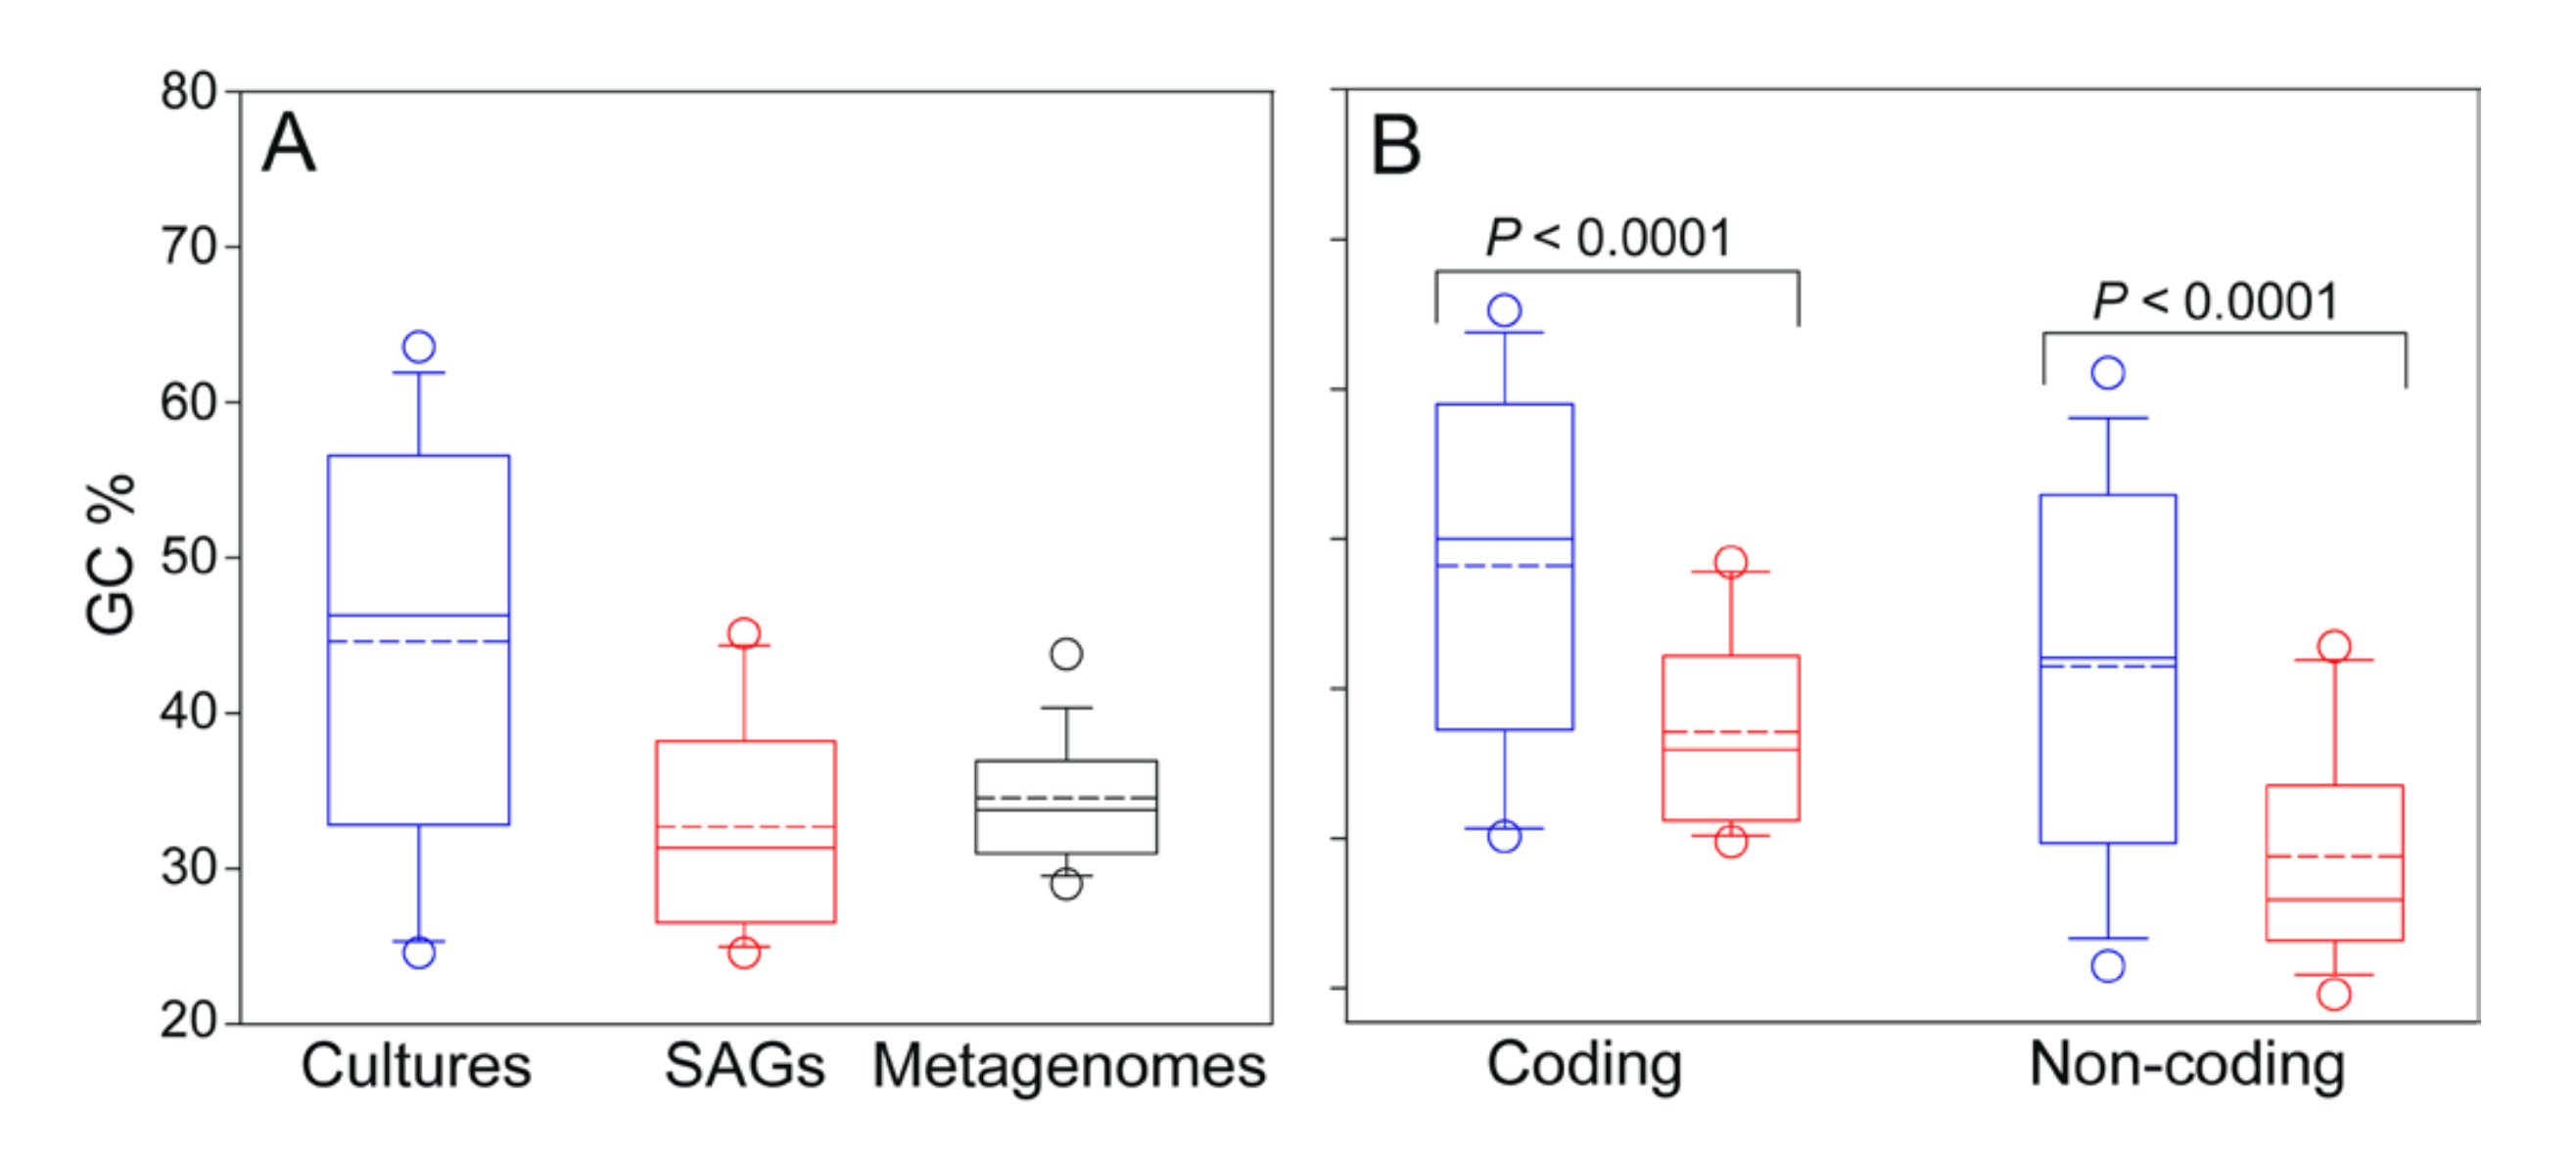

In [5]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/Swan_FigS2.png")

And below is the recreated figure from my analysis.

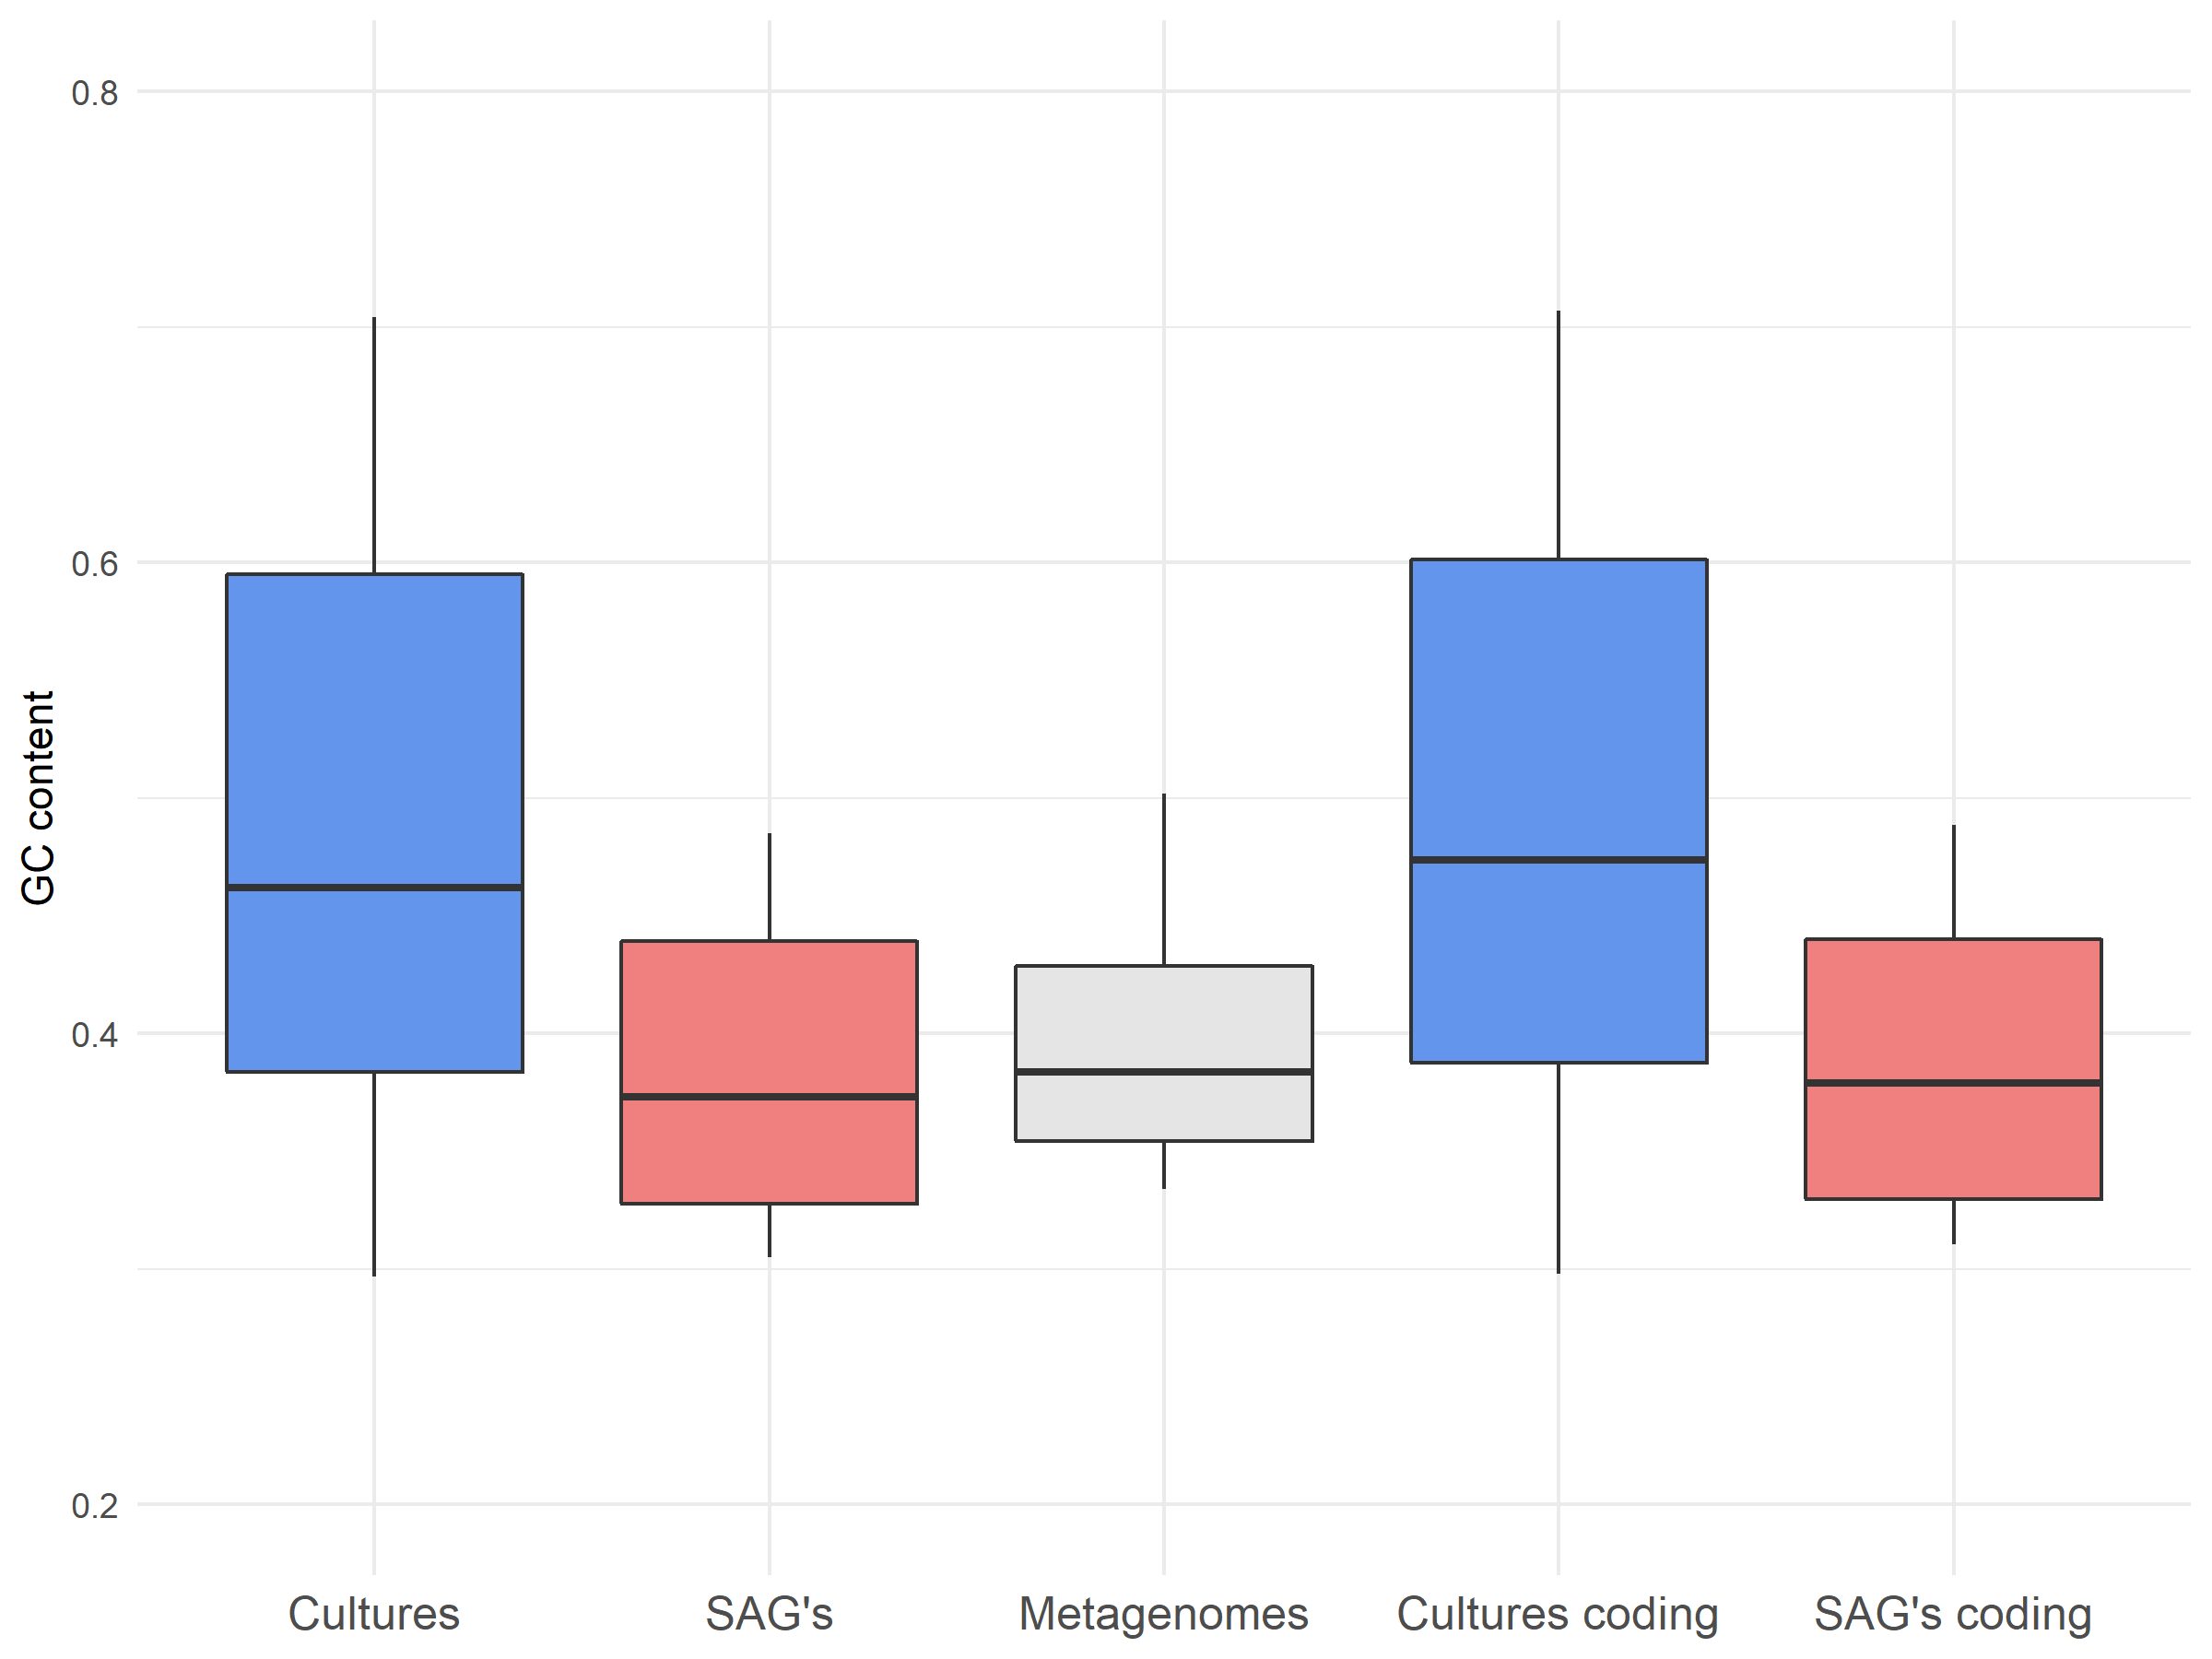

In [6]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/GC_plot.png")

To recreate this figure, I simply counted the GC content for downloaded SAG's, cultures, and metagnomes, and the coding regions (CDS) predicted by Prodigal. The authors didn't say how they calculated GC content for non-coding regions, so I only calculated it for all genomic DNA and for coding regions. 

The GC content of SAG's, metagenomes and SAG coding regions are all significantly lower than cultures and culture coding regions. 

## Paralog Content

Organisms with streamlined genomes are expected to have smaller genomes in general as well as fewer gene duplciations or paralogs.

Below is Figure 2 from Swan et al., showing the percentage of genes within "paralog families" plotted against genome size.

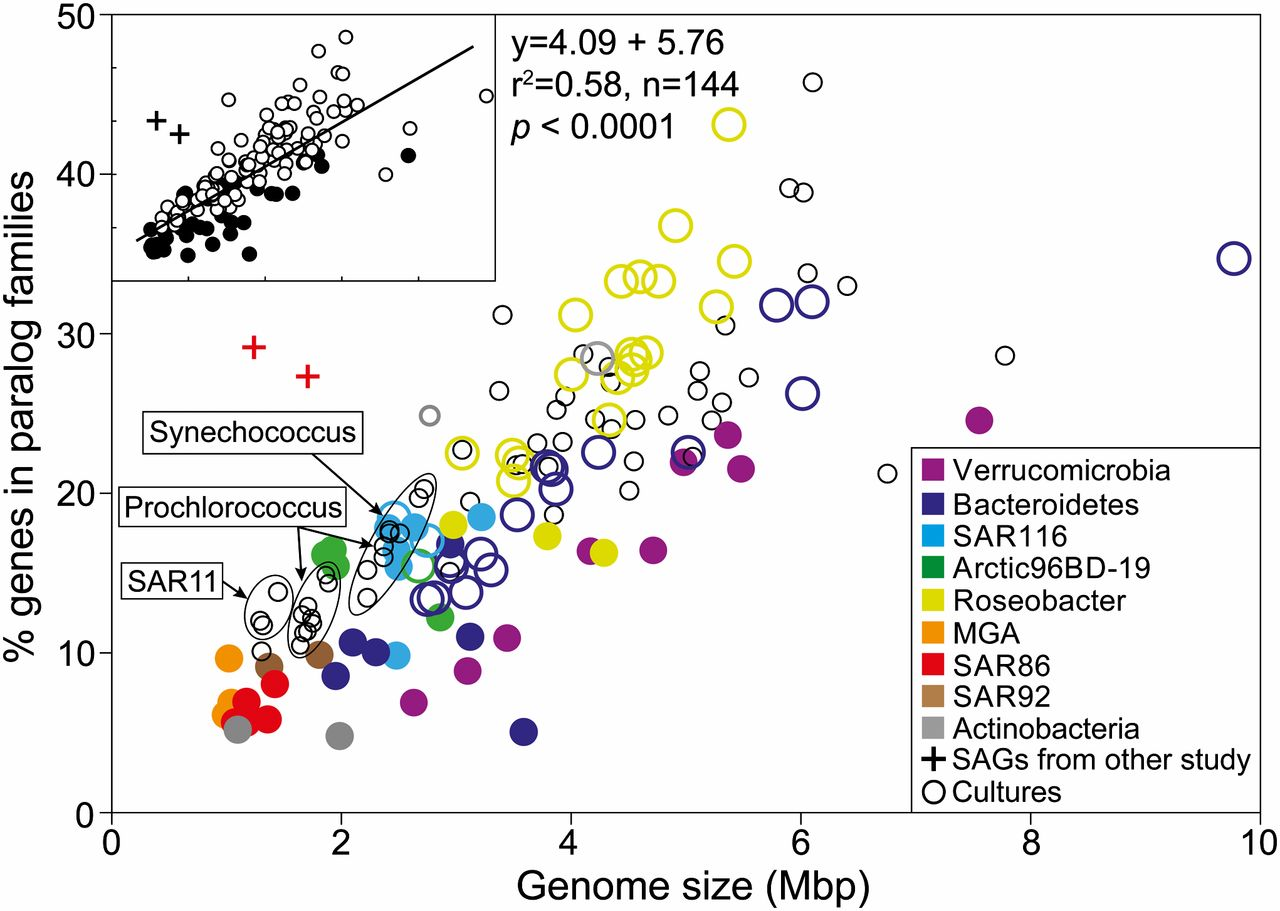

In [4]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/Swan_Fig2.jpg")

Despite the authors' terminology, their methods do not test whether SAG's have fewer paralogs than cultured marine bacteria. Paralogy describes the evolutionary relationship between genes arising from a duplication event within a particular lineage, and so it requires a phylogenetic hypothesis. Instead, Swan et al. simply cluster protein sequences by similarity. They define any genes that are 30% similar over 50% of their length (with an e-value cutoff of 1e-6) as members of a "paralog family." This approach has been used as a proxy for paralogy in the past (Pushker et al. 2004), but I would argue that it really only approximates homology in general. The clusters identified in this way certainly include distant orthologs as well as paralogs, especially given that the organisms used in this study are sampled across enormous evolutionary distances. My point is that this approach says nothing about the frequency of gene duplications within lineages, as claimed by the authors, but instead measures the frequency of genes within simlarity-based gene families. This could still be useful as a signature of genome streamlining, and despite these reservations I will use the term paralog in the same way as Swan et al. to remain consistent.

I used BlastClust in BLAST version 2.22.2 using the same parameters as the authors to cluster the predicted protein sequences output by Prodigal.

Because I was only able to download 38 of the 101 cultures used in Swan et al. from NCBI, I also downloaded an additional 20 cultured bactrioplankton genomes that were not used in the original study. I performed the subsequent steps with and without these extra cultures, and the results are the same in both cases. 

To estimate assembly completeness, Swan et al. used the now-deprecated COG (Clusters of Orthologous Groups) database to identify single-copy orthologs within bacterial groups. Assembly completeness was calculated as the percentage of single-copy orthologs recovered in a given assembly. In order to recreate this analysis, I used BUSCO (Benchmarking set of Universal Single-Copy Orthologs), which contains pre-curated groups of single-copy orthologs for different taxonomic levels, including the Bacteria domain. Using BUSCO on SAG predicted proteins with the Bacteria database gave generally comparable results to the assembly completeness numbers in Swan et al., usually within ~1%. However, this approach of estimating genome sizes based on ortholog recovery is sensitive to the database used and can give divergent results for incomplete assemblies. One Roseobacter SAG (AAA076-E06) was 1.7% complete according to Swan et al., giving an estimated genome size of 12.8 Mbp. Using BUSCO, I estimated its completeness as 0.7%, which gave an esimated genome size of >30Mbp, more than twice as large as the largest-known bacterial genome (Han et al. 2013). This outlier was removed from subsequent analysis. 

My recreation of Figure 2 is shown below. This includes the 20 additional cultures not used in the original paper. 

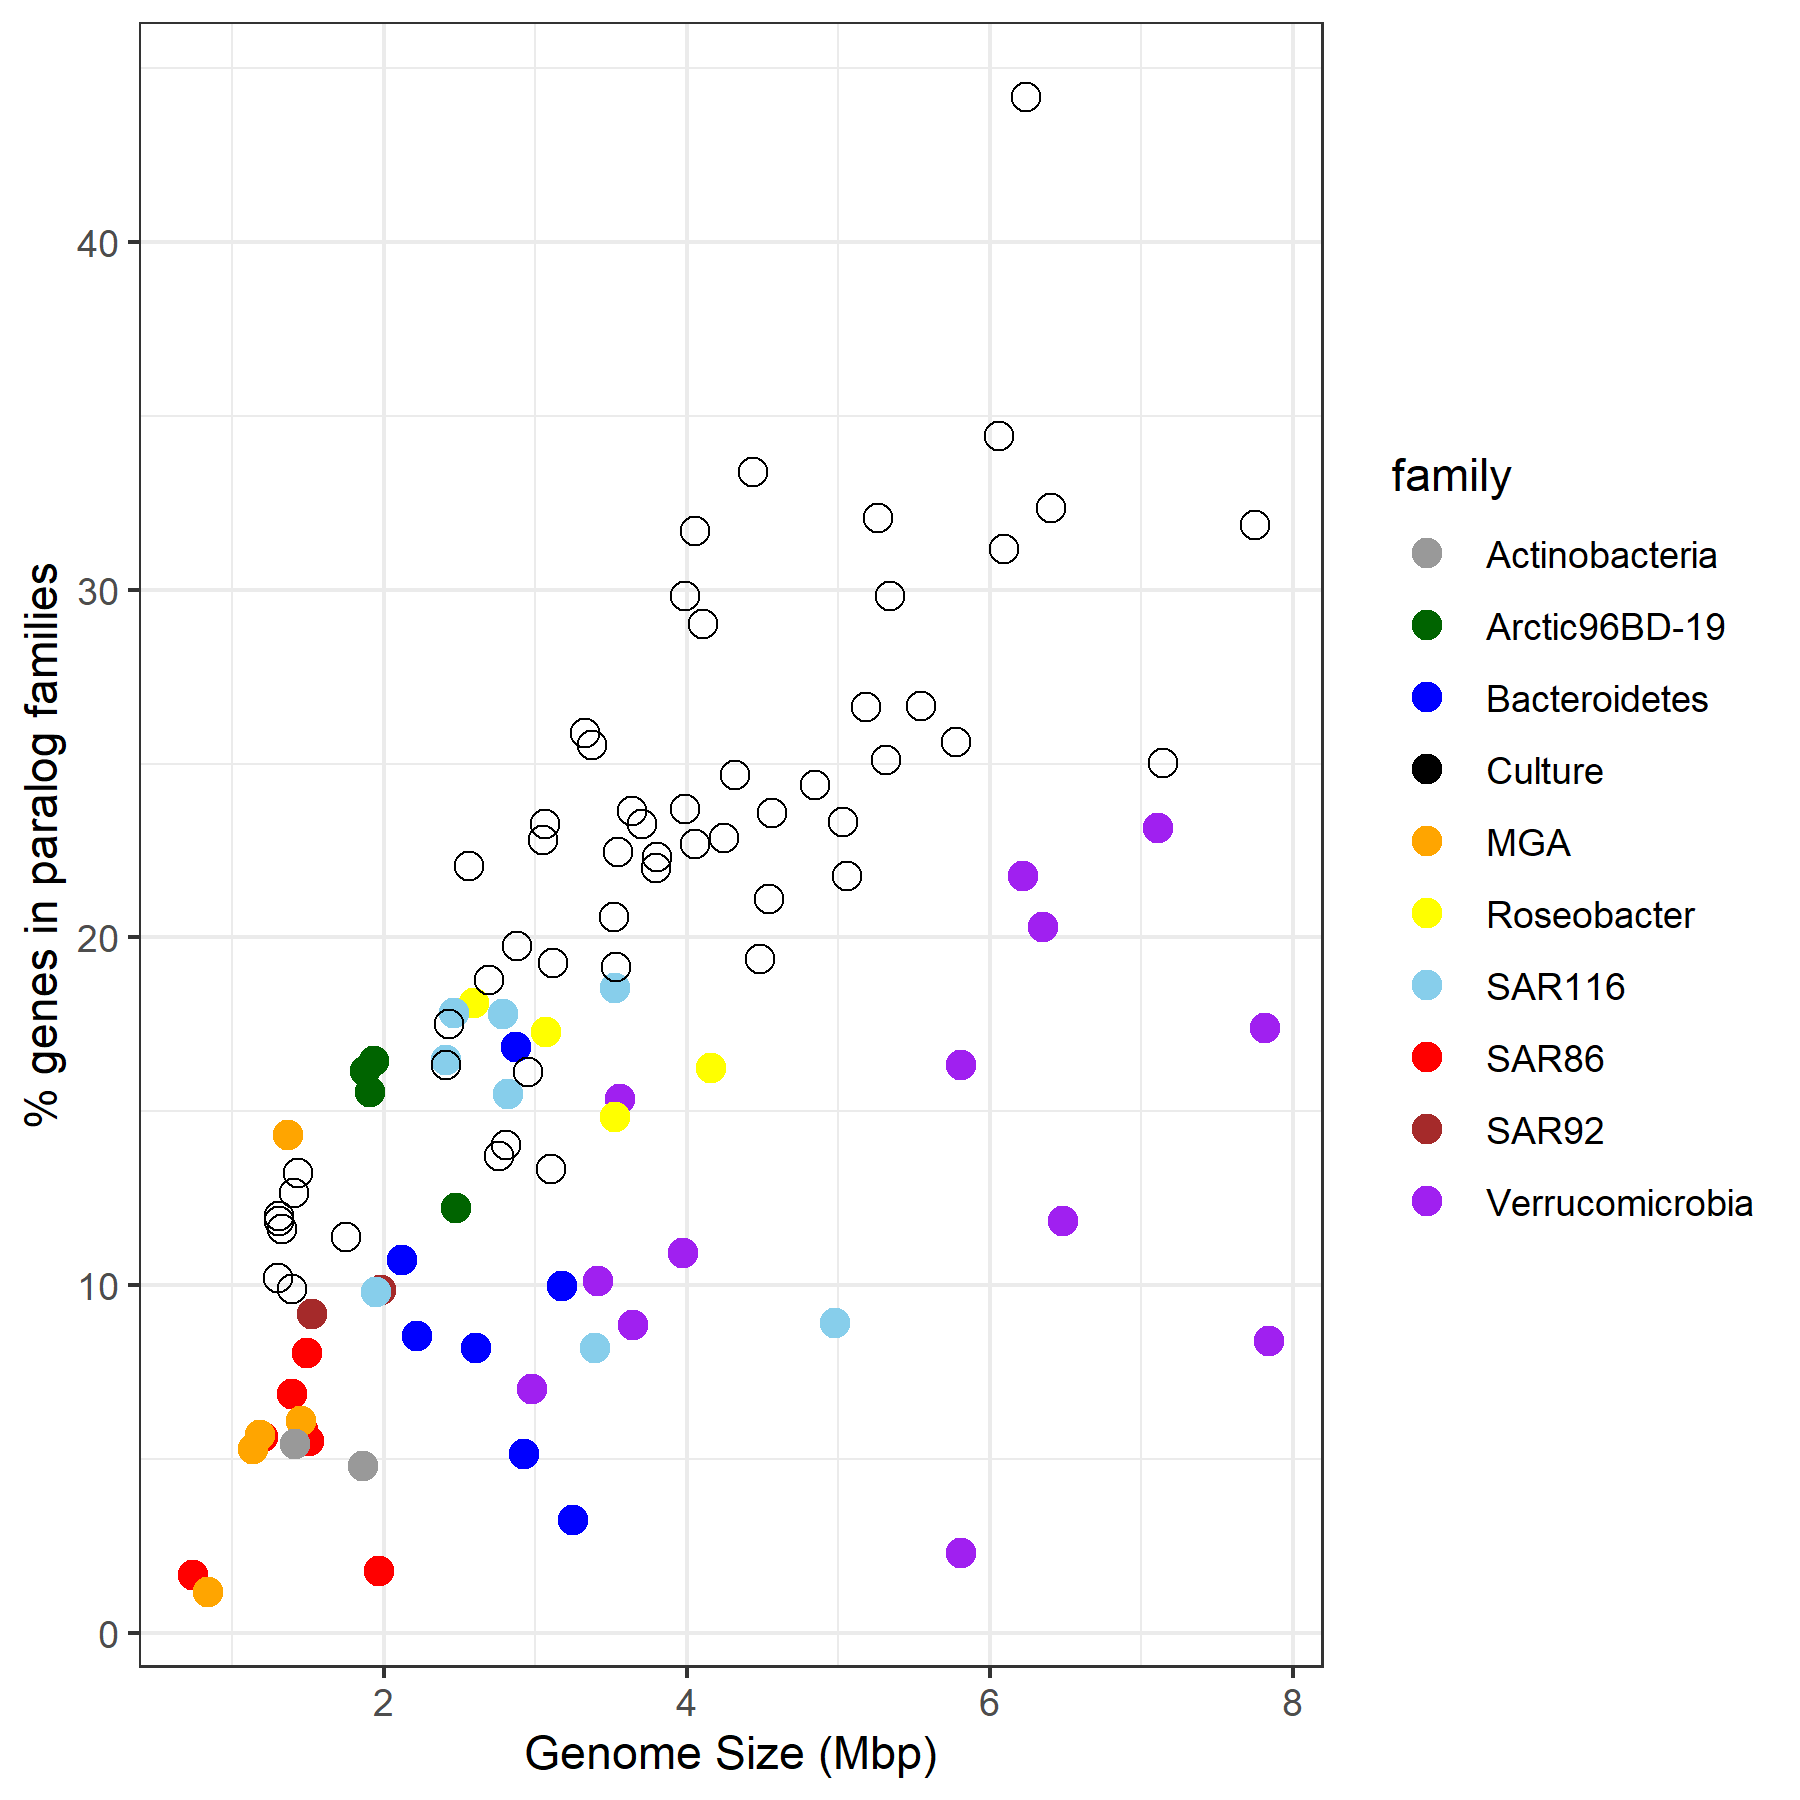

In [10]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/paras_extra.png")

Swan et al. used Figure 2 to argue that SAG's have fewer gene duplications than cultured bacterioplankton. However, they don't show this quantitavitley. In order to test this, I used a simple ANOVA test (implemented in R, code in the script paras_plot.R) to compare the slopes of two regression lines, one for cultures and one for SAG's. This is shown in the figure below. 

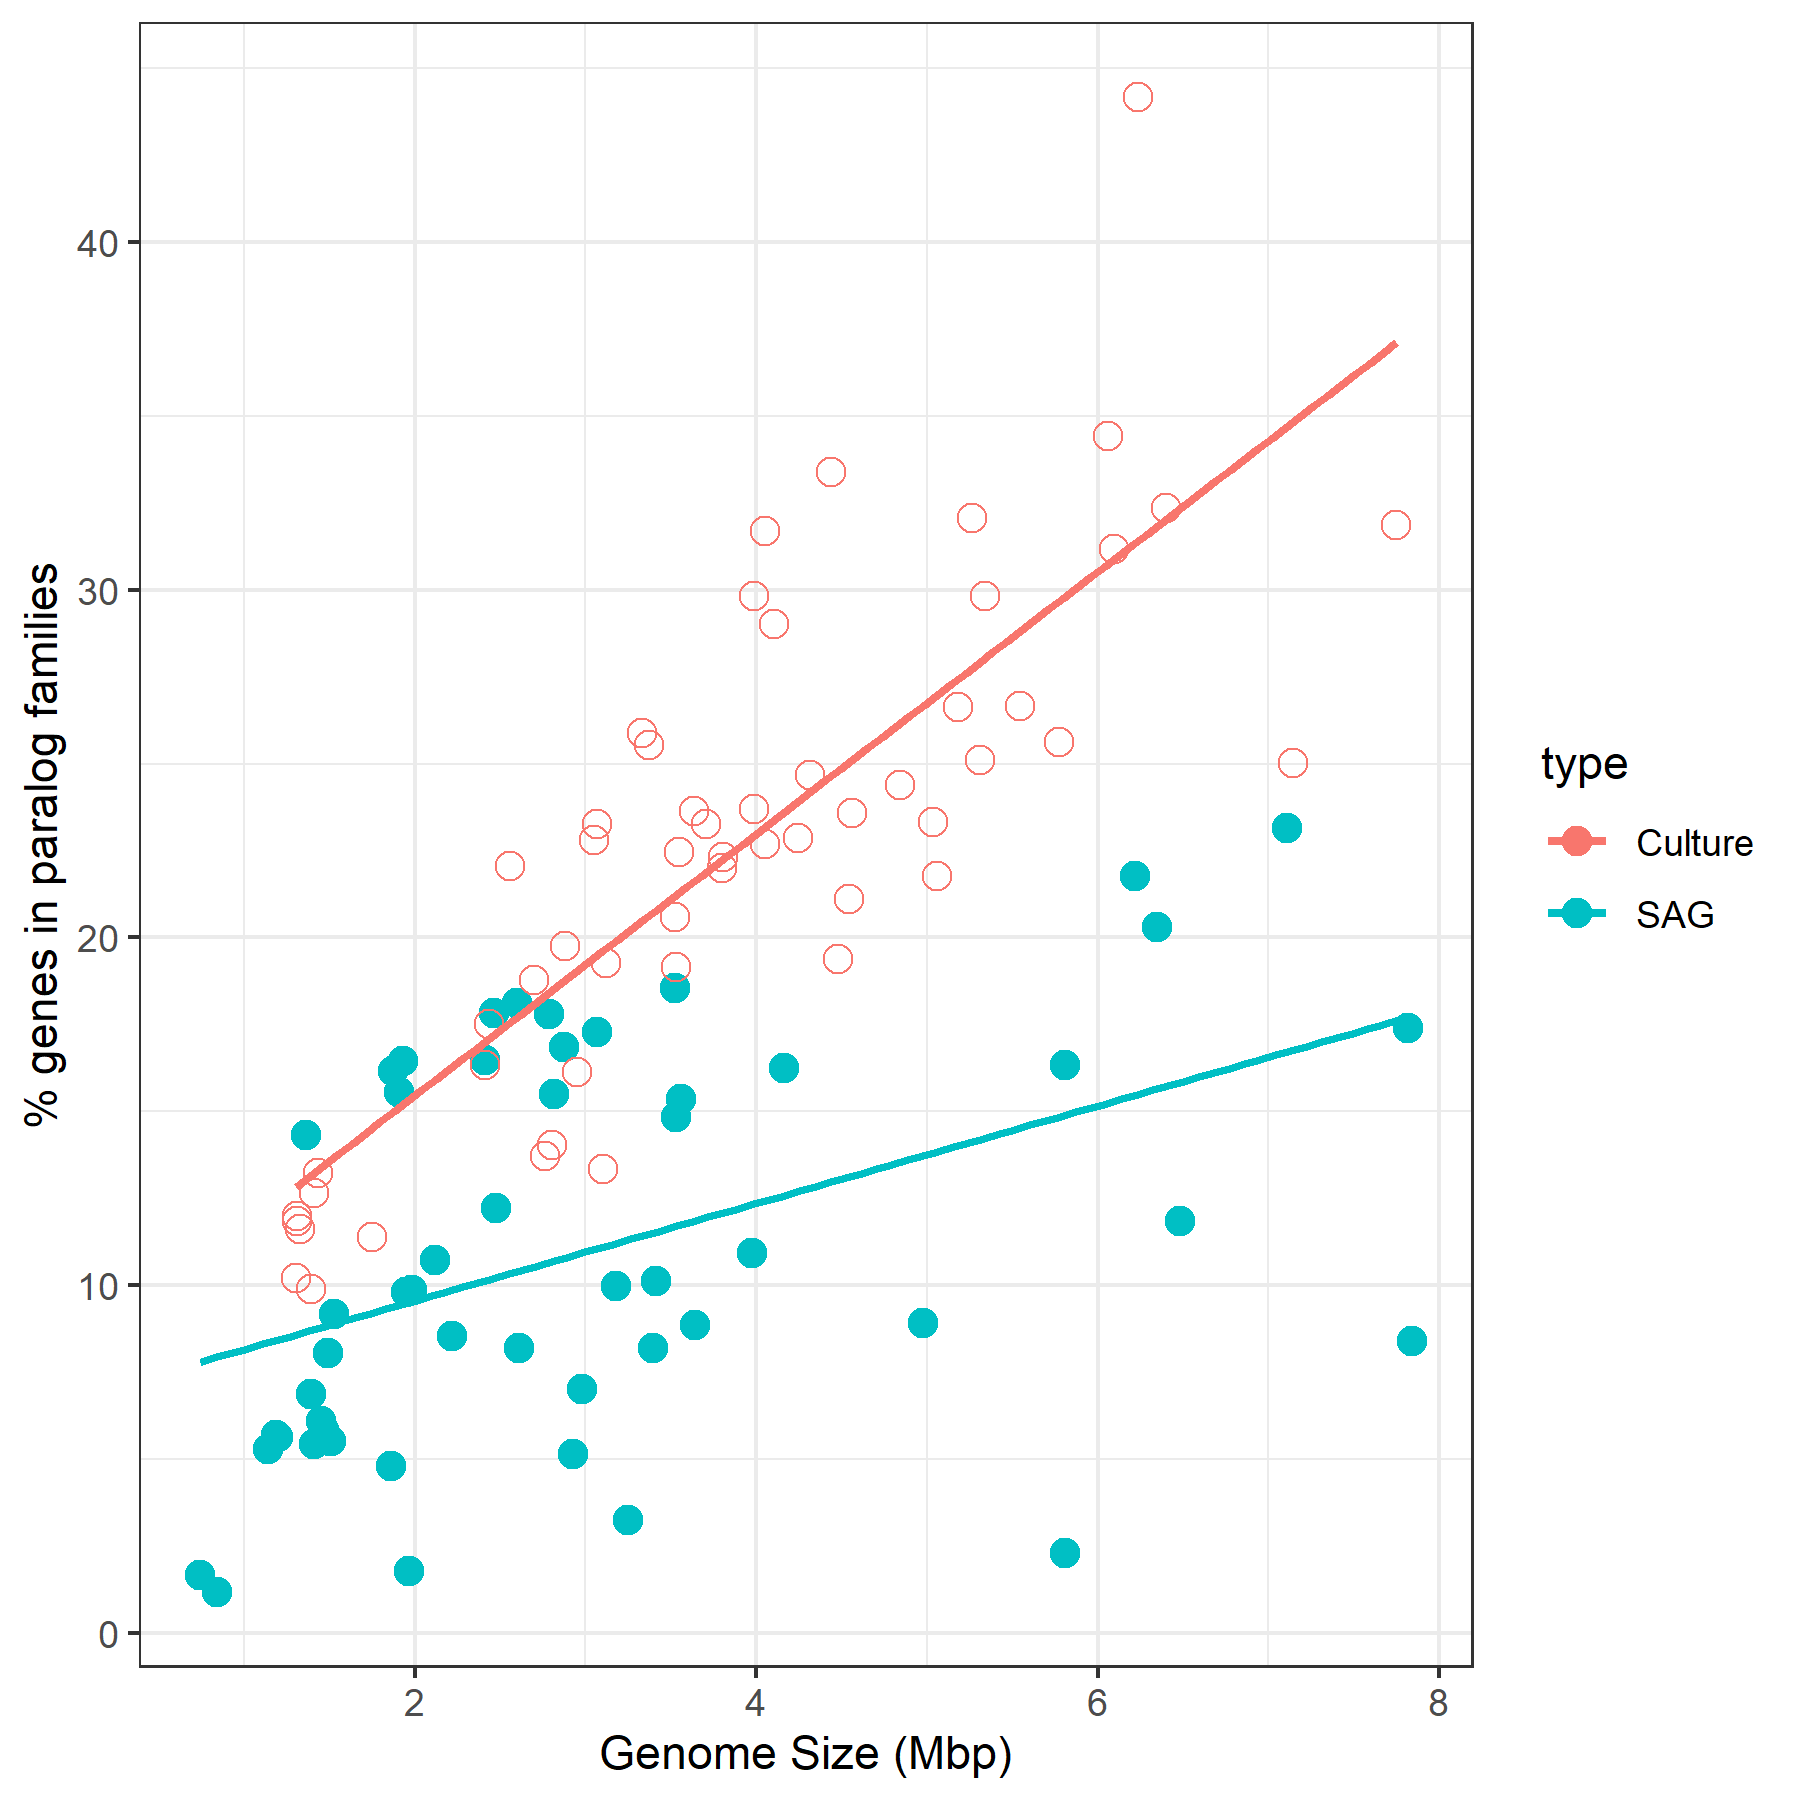

In [9]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/paras_regression_extra.png")

The two slopes are significantly different (p=6e-12), meaning that SAG's have fewer paralogs for a given genome size compared to cultures, ie. their reduced paralog frequency is not merely a consequence of smaller genome sizes. 

The difference between these regression lines is actually stronger using my results than those from the original paper. Therefore, despite the above caveats concerning the definition of paralogy, the uncertainty with estimated genome sizes, and my inability to download the entire set of cultured genomes used in the original study, my results strongly support the idea that uncultured bacterioplankton have streamlined genomes, in the sense of having fewer genes within gene families. 

### Metagenome Fragment Recruitment

A central goal of Swan et al 2013 was to investigate the geographical distribution of their SAGs by utilizing existing metagenomic datasets. By BLASTing the metagenomic reads against their SAGs, they could look at the proportion of metagenomic reads that map to the SAGs and thus infer their geographic distribution. This technique is called metagenome fragment recruitment. 

Table S5 contains metadata about the metagenomes that were used in the fragment recruitment analysis and Figure 3 displays the results in the form of a heatmap. They used 41 SAGs (displayed on rows of heatmap) and 89 metagenomes (displayed on columns of heatmap). However, there were over one hundred entries in Table S5, so it was clear that some metagenomes consisted of multiple entries. No accession numbers were provided, and the metagenomic data was retrieved by manual sleuthing, involving assumptions about which samples were included (as many stations had multiple depths, size fractions, etc.). The data retrieval process is documented in an accompanying Jupyter notebook in the 'wrangling' folder (metagenome_fetching_filtering.ipynb) and discussed in the project README.  

Both the SAGs and metagenomes were processed before fragment recruitment. Briefly, before fragment recruitment rRNA regions were masked from the SAGs and metagenomic data was filtered using Prinseq as outlined in the Materials and Methods section of the article. Each metagenome was BLASTed against each SAG, for a total of 3649 pairs. BLAST parameters were set in accordance with Swan et al 2013 when possible (see discussion below for a discussion of some deviations). 

Below is Figure 3 from Swan et al 2013.

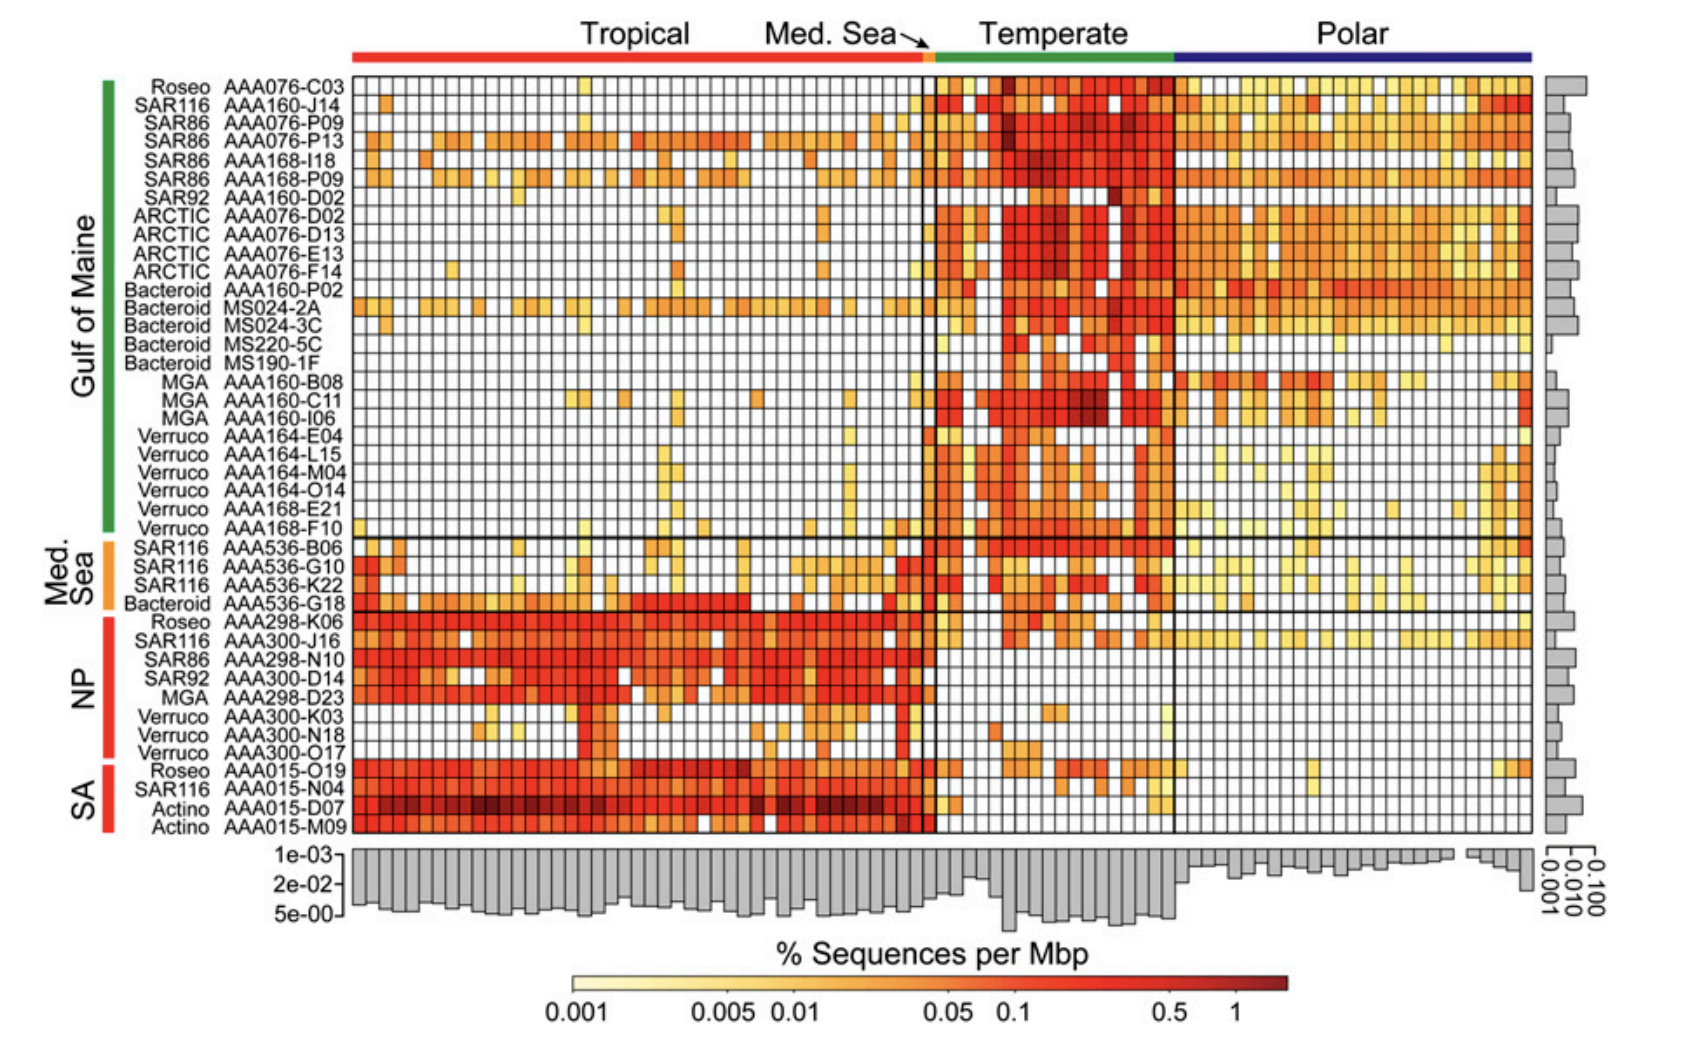

In [7]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/Swan_Fig3.png")

Below is the recreated figure from our replicated analysis. 

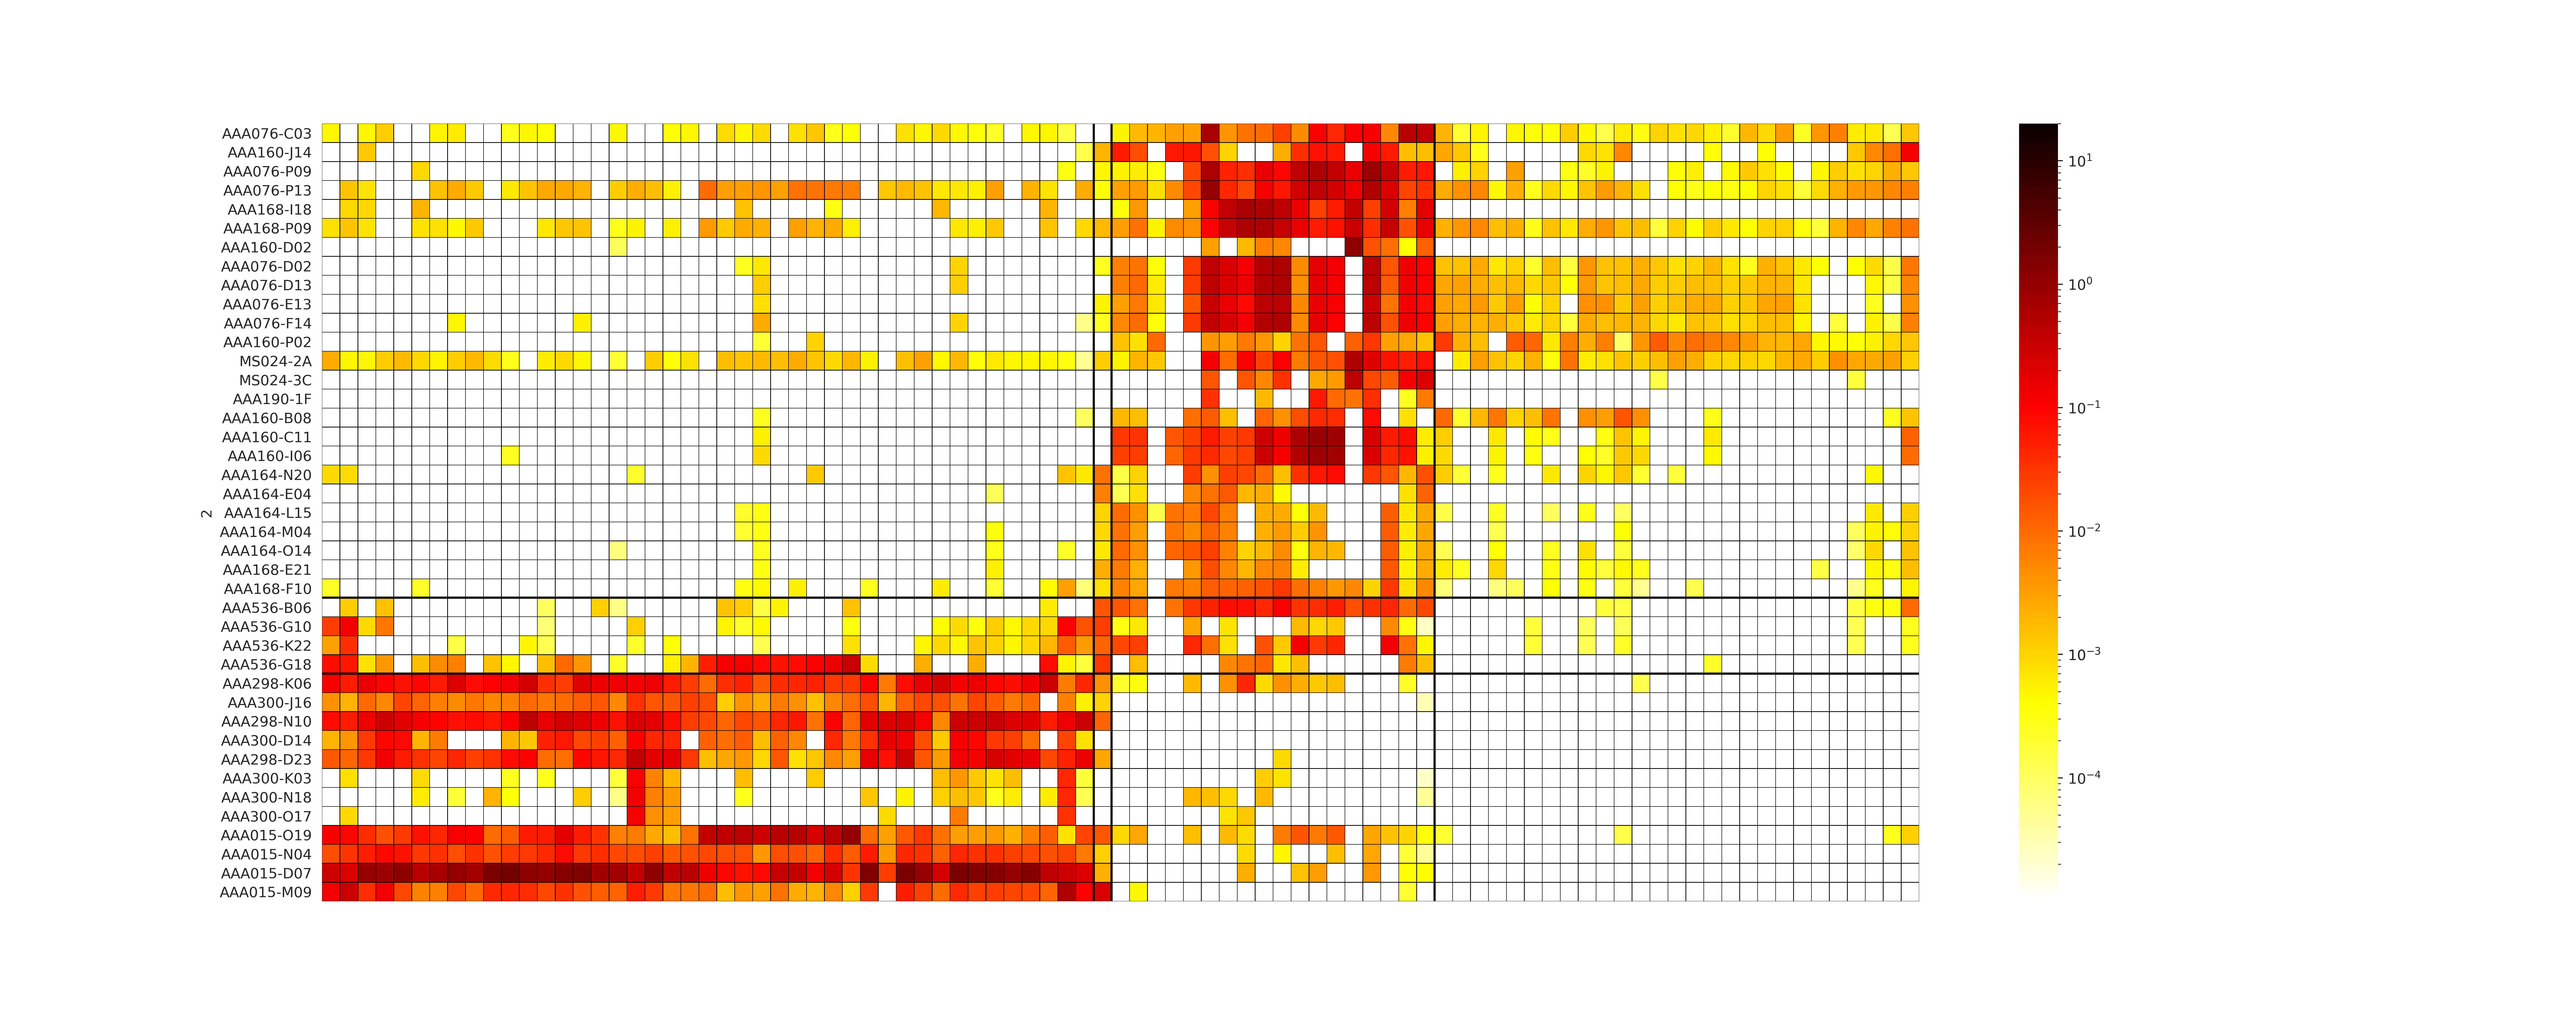

In [8]:
Image("/vortexfs1/omics/env-bio/collaboration/genome-streamlining/Genome-Streamline/output/plots/recreated_fig3.png")

Ignoring the absence of some bells and whistles from the original plot, you can see that the general patterns are actually quite similar. We were somewhat surprised by this given the lack of appropriate documentation and the use of different upstream processing pipelines. 

The figures show that SAGs recovered from the tropics (North Pacific and South Atlantic), tend to have a higher percentage of reads mapping to them from metagenomes of tropical samples. Not too surprising. A similar trend can be seen for the Mediterranean and temperate SAGs and metagenomes, though many temperate SAGs also recruit a modest proportion of reads from polar metagenomes. 

Differences in the color palettes make it difficult to compare absolute metagenome fragment percentages between the two figures, but the relative intensities are in accordance with one another. Some SAGs in particular seem to be less represented in certain metagenomes in the recreated figure than the original. For example, AAA300-J16 (from the North Pacific) has little to no reads mapping to it from polar metagenomes in the recreated figure, whereas in the original figure there is a noticeable stripe of yellow corresponding to modest polar recruitment. The opposite can also be observed, for example with AAA076-CO3 (from the Gulf of Maine) recruiting from tropical metagenomes at high levels in the recreated figure, but with little to none in the original. 

Despite these differences, the figures are strikingly similar. This demonstrates that the more meaningful biological signals in the data are strong enough to be resolved despite the differences in processing. Below I will provide a by no means exhaustive discussion of the differences between the two analysis pipelines and how they might have skewed the results. 

The first and perhaps most meaningful difference lies in the metagenomic data. As stated above, no accession numbers were provided in the paper and the data had to be tracked down more or less by hand. The fact that most of the metagenomes were from the Global Ocean Sampling (GOS) made it somewhat more feasible, but it was still quite laborious. As stated above, most of the stations were represented by multiple samples, from different depths and different size fractions. I attempted to retain only metagenomes that were from the surface ocean and from the bacterial size fraction. This information was often missing, though, especially for the GOS metagenomes from the polar regions, perhaps explaining some inconsistencies in the right-most section of the figure. Table S5 listed the number of reads for each sample/accession, which were often wildly different from what I retrieved from SRA. 

Another difference between our recreated analysis and the original is the annotation of rRNA regions. They masked the 16S, 28S, 5.8S, and internal transcribed spacer regions based on annotations performed using models built from SILVA, but they did not specify the tool. I used the tool barrnap, which was used because it was fast, easy, and available in a conda install. Another difference here is that I could not find an efficient way of masking the ITS, as barrnap annotates just the rRNA genes themselves. As such, they were not masked during recruitment. I cannot imagine this makes a huge difference, as the ITS represent such a small proportion of the genome, but it is worth mentioning. 

After annotating these regions, they must be masked in some way. They did not specify how this was done. I used tools with BBTools to change these regions to lowercase and then created blast databases to mask them. It is apparent that they used a similar method because the use the lcase masking flag in their BLAST parameters, but it is unclear if it had the identical effect. I do not suspect this made a meaningful difference. 

The final difference has to do with BLAST itself. I used the closest version that was available in a conda install (2.2.31), but could not get the exact version they used (2.2.25). Changes in between versions certainly could have skewed the results. Furthermore, the parameter values -reward 1 -penalty -1 were not compatible with the default -gapopen and -gapextend parameters in BLAST+ 2.2.31, so I changed them to 3 and 2, respectively. I am not sure what effect this might have had on recruitment, and there was no information in the paper to indicate which values they used for these parameters.

While there were certainly many differences between the two analysis pipelines, the concordance of the results suggests that these patterns are robust to any deviations. The two figures show similar patterns in the geographic distribution of sequences similar to those within their SAGs and provide insights into the affinity of various taxa to particular environments. 